# Principal Component Analysis (PCA) from Scratch with Visualization

## Aim of the Notebook

The aim of this notebook is to implement Principal Component Analysis (PCA) from scratch using only NumPy and Matplotlib, without using any built-in PCA functions. The notebook demonstrates how PCA performs dimensionality reduction by computing the covariance matrix, eigenvalues, and eigenvectors step by step on a small hardcoded dataset. Visualizations are included to build intuition about how PCA finds new axes and projects data onto lower dimensions.

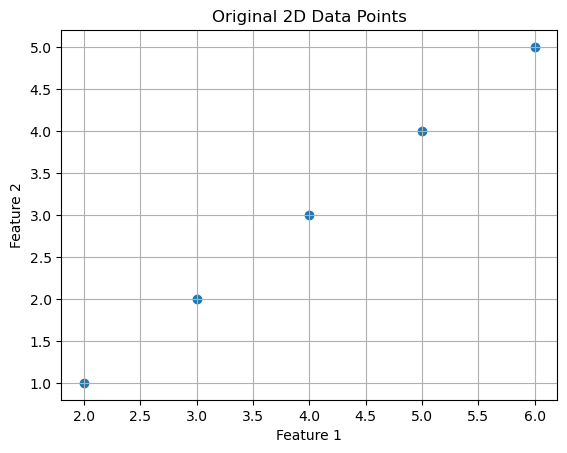

Dataset:
 [[2 1]
 [3 2]
 [4 3]
 [5 4]
 [6 5]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Hardcoded Dataset (2 features)
X = np.array([
    [2, 1],
    [3, 2],
    [4, 3],
    [5, 4],
    [6, 5]
])

#plotting the data

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original 2D Data Points")
plt.grid(True)
plt.show()

print("Dataset:\n", X)

In [10]:
# computing the mean of each features 
mean = np.mean(X, axis=0)
print("Mean of each feature:", mean)

Mean of each feature: [4. 3.]


In [11]:
# Center the data 
X_centered = X - mean
print("Mean-centered data:", X_centered)

Mean-centered data: [[-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]]


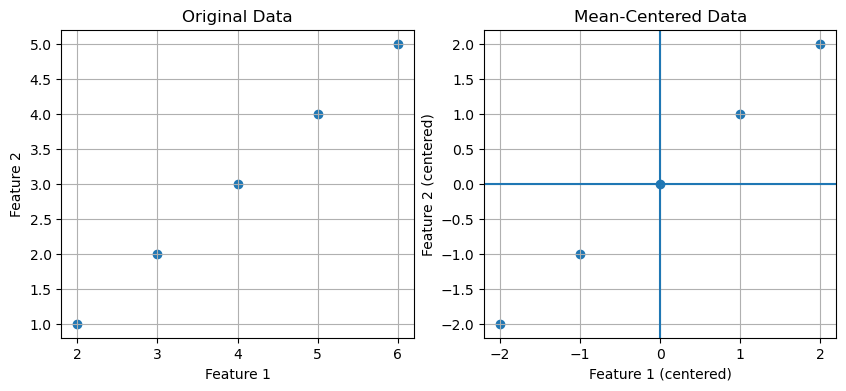

In [12]:
# Visualizing  original vs centered
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.title("Mean-Centered Data")
plt.xlabel("Feature 1 (centered)")
plt.ylabel("Feature 2 (centered)")
plt.axhline(0)
plt.axvline(0)
plt.grid(True)

plt.show()





The right plot is the mean-centered version of the original data. The data cloud is shifted so that its mean lies at (0,0) while preserving the original structure and correlation. Mean centering is necessary for PCA to correctly compute directions of maximum variance.

### Computing covariance Matrix of the Centered Data

The covariance matrix captures the variance of each feature and the correlation between features. PCA uses this matrix to find the principal component directions that preserve maximum variance.

In [16]:
cov_matrix = np.cov(X_centered.T)   # transpose because np.cov expects features as rows

print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[2.5 2.5]
 [2.5 2.5]]


### What each value means

For the covariance matrix:

[[2.5, 2.5],  
 [2.5, 2.5]]

- 2.5 (top-left) → Variance of Feature 1  
- 2.5 (bottom-right) → Variance of Feature 2  
- 2.5 (off-diagonal values) → Covariance between Feature 1 and Feature 2  

The large positive covariance value indicates that both features increase together and are highly correlated. This shows that the two features contain redundant information and most of the variance lies along a single direction in the feature space, which makes this dataset suitable for dimensionality reduction using PCA.

###  Eigenvalues and Eigenvectors (Finding Principal Components)

In [17]:
# Computing eigenvalues and eigenvectors of covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues:
 [5.00000000e+00 5.55111512e-16]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [18]:
# Sorting eigenvalues and eigenvectors in descending order

idx = np.argsort(eigenvalues)[::-1]   # indices to sort in descending order

eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print("Sorted Eigenvalues:\n", eigenvalues_sorted)
print("\nSorted Eigenvectors:\n", eigenvectors_sorted)

Sorted Eigenvalues:
 [5.00000000e+00 5.55111512e-16]

Sorted Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


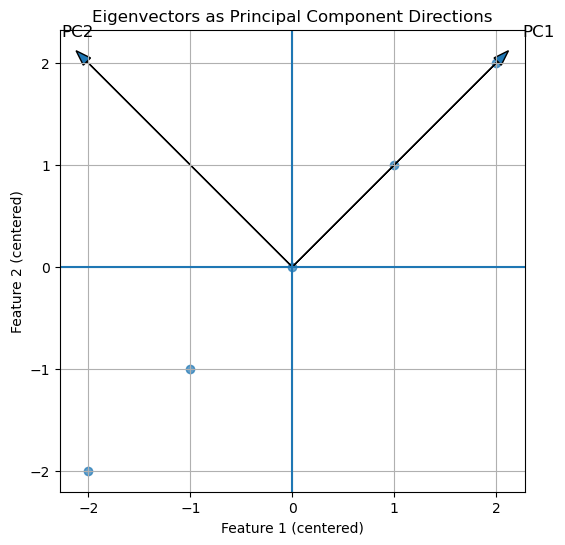

In [19]:
# Visualizing Eigan Vectors (Principal Component Direction)

plt.figure(figsize=(6, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7)
plt.axhline(0)
plt.axvline(0)

# Plot eigenvectors as arrows from the origin
origin = np.array([0, 0])

# PC1
pc1 = eigenvectors_sorted[:, 0]
plt.arrow(origin[0], origin[1], pc1[0]*3, pc1[1]*3, 
          head_width=0.1, length_includes_head=True)
plt.text(pc1[0]*3.2, pc1[1]*3.2, "PC1", fontsize=12)

# PC2
pc2 = eigenvectors_sorted[:, 1]
plt.arrow(origin[0], origin[1], pc2[0]*3, pc2[1]*3, 
          head_width=0.1, length_includes_head=True)
plt.text(pc2[0]*3.2, pc2[1]*3.2, "PC2", fontsize=12)

plt.xlabel("Feature 1 (centered)")
plt.ylabel("Feature 2 (centered)")
plt.title("Eigenvectors as Principal Component Directions")
plt.grid(True)
plt.axis('equal')
plt.show()

#### Interpretation of Principal Component Directions (Visualization)

PC1 captures maximum variance; PC2 is perpendicular with negligible variance.

In [21]:
# Projecting the data onto the first principal component (PC1)

pc1 = eigenvectors_sorted[:, 0]   # First principal component (direction)

# Project centered data onto PC1 (dot product)
X_reduced_1D = X_centered @ pc1

print("1D representation of data after PCA:\n", X_reduced_1D)

#2D data projected onto PC1, resulting in 1D representation.

1D representation of data after PCA:
 [-2.82842712 -1.41421356  0.          1.41421356  2.82842712]


## Step 6: Visualizing Dimensionality Reduction (2D → 1D)

We now visualize how the original 2D points collapse onto PC1.

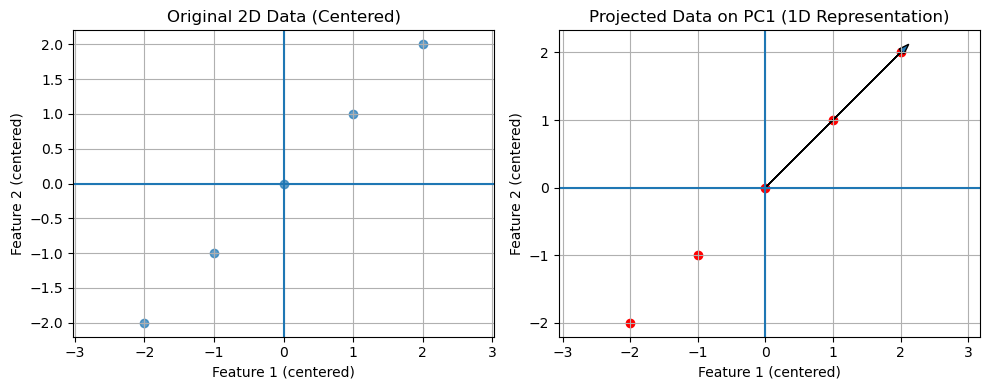

In [ ]:
# Step 6 (Alternate): Visualize before and after PCA in separate graphs

pc1 = eigenvectors_sorted[:, 0]

# Projected points on PC1 (for plotting on the PC1 line)
projected_points = np.outer(X_reduced_1D, pc1)

plt.figure(figsize=(10, 4))

# Plot 1: Original 2D data
plt.subplot(1, 2, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7)
plt.axhline(0)
plt.axvline(0)
plt.xlabel("Feature 1 (centered)")
plt.ylabel("Feature 2 (centered)")
plt.title("Original 2D Data (Centered)")
plt.grid(True)
plt.axis('equal')

# Plot 2: Projected data on PC1 (1D embedded in 2D for visualization)
plt.subplot(1, 2, 2)
plt.scatter(projected_points[:, 0], projected_points[:, 1], color="red")
plt.axhline(0)
plt.axvline(0)
plt.arrow(0, 0, pc1[0]*3, pc1[1]*3, head_width=0.1, length_includes_head=True)
plt.xlabel("Feature 1 (centered)")
plt.ylabel("Feature 2 (centered)")
plt.title("Projected Data on PC1 (1D Representation)")
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

### Conclusion

PCA successfully reduced correlated 2D data to a 1D representation.
NOTE: The same PCA transformation should be applied to new inputs before prediction.